### 1. California Housing Dataset

Load the built-in California Housing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = fetch_california_housing()
print(data.feature_names)
print(data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [ ]:
X = data.data
Y = data.target
print(X.shape)
print(Y.shape)

(20640, 8)
(20640,)


Split data into train/test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### 2. Decision trees



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

Mean Squared Error (MSE): 0.6291684859198612
Mean Absolute Error (MAE): 0.5916184484431538


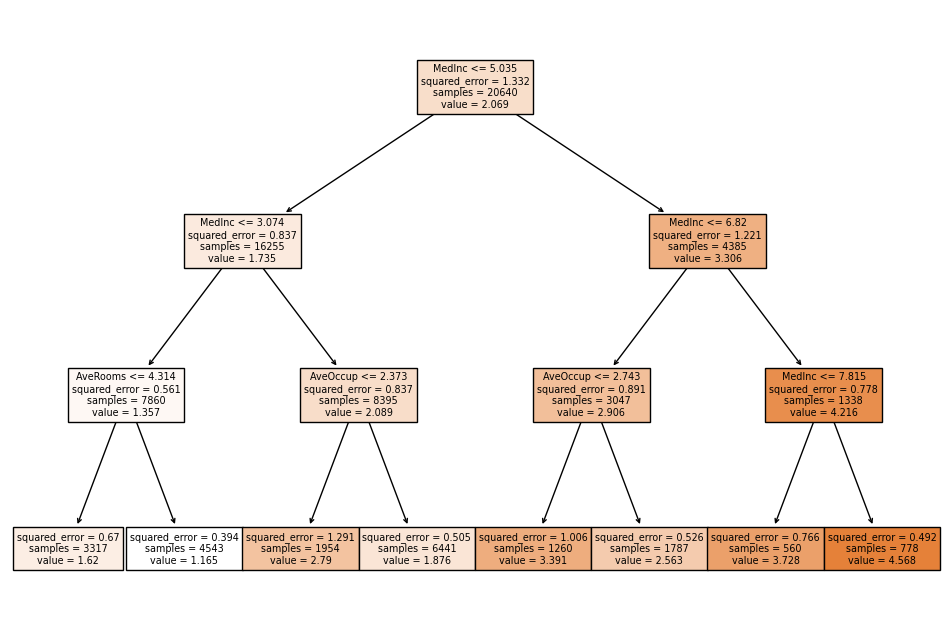

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
regressor = DecisionTreeRegressor(max_depth =3,random_state=42)
regressor.fit(X, Y)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
regressor.fit(X, Y)

plt.figure(figsize=(12, 8))
a=tree.plot_tree(regressor, filled=True, feature_names=data.feature_names)
plt.show()

### 3. Random forests


*   Constructing Random Forests Regressors with n_estimators (number of trees) being: 2, 3, 5, 10, 20, 50, 100, 200
*   Fitting the models on the training set. Compute MSE loss on the test set
*   plot of #trees vs. test loss





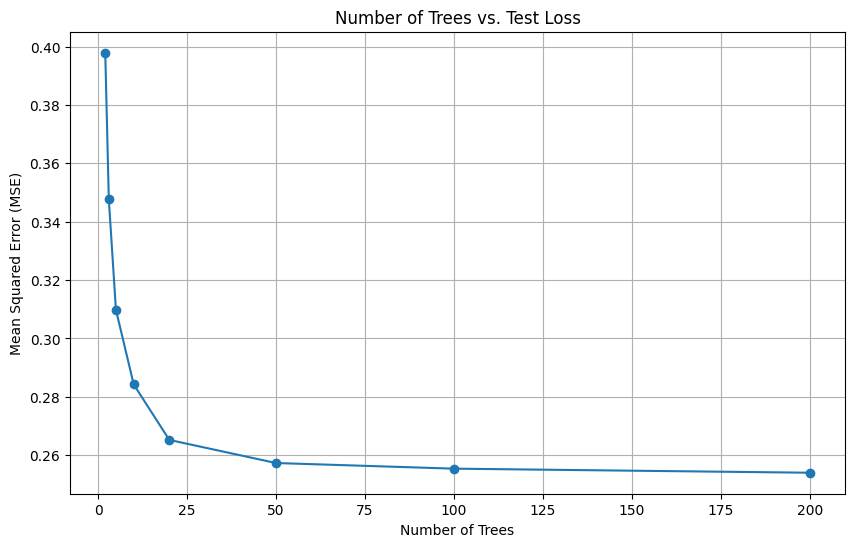

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
n_estimators = [2, 3, 5, 10, 20, 50, 100, 200]
test_losses = []

for n in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_losses.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, test_losses, marker='o')
plt.title('Number of Trees vs. Test Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

### 4. Gradient Boosted Trees



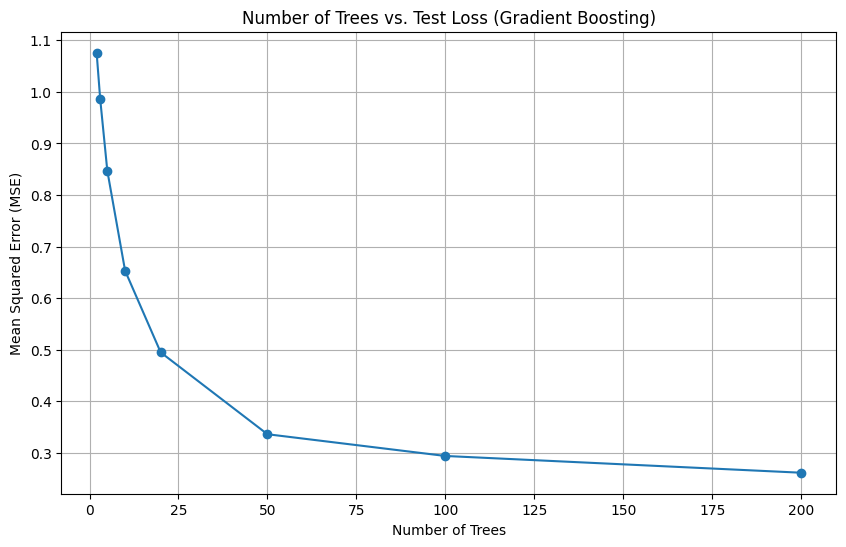

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
n_estimators = [2, 3, 5, 10, 20, 50, 100, 200]
test_loss = []

for n in n_estimators:
    gb_regressor = GradientBoostingRegressor(n_estimators=n, random_state=42)
    gb_regressor.fit(X_train, y_train)
    y_pred = gb_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_loss.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, test_loss, marker='o')
plt.title('Number of Trees vs. Test Loss (Gradient Boosting)')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()